## 3 PCA and Eigenface [50 points]

### For this exercise, you will use principal component analysis (PCA) to analyze face images in any programming language of your choice (e.g., Python/Matlab/R). The data set faces.dat; each row represents an image (400 images), and each column represents a pixel (64 × 64 = 4096 pixels).


### (a) [5 points] Display the 200th image.


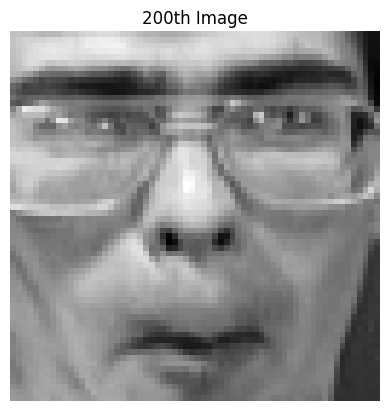

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# load the dataset
faces = np.loadtxt('faces.dat')

# reshape the 200th image to 64x64
img200 = faces[199, :].reshape(64, 64).T

# display 200th image
plt.imshow(img200, cmap='gray')
plt.title('200th Image')
plt.axis('off')
plt.show()


### (b) [5 points] Remove the mean of the images (4 points), and then display the 200th image (1 point).

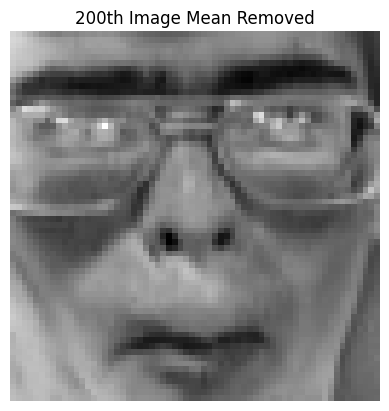

In [99]:

# calculate the mean image
meanImg = np.mean(faces, axis=0)

# remove mean from each image
facesMinusMean = faces - meanImg

# reshape
image200MinusMean = facesMinusMean[199, :].reshape(64, 64).T

# display the 200th image 
plt.imshow(image200MinusMean, cmap='gray')
plt.title('200th Image Mean Removed')
plt.axis('off')
plt.show()


### (c) [10 points] Perform PCA on the mean-centered data matrix. You can either implement PCA by yourself using eigenvalue decomposition over the sample covariance matrix, or use a existing machine learning toolbox. (6 points) Sort the eigenvalues in a descending order and plot them. Report the largest eigenvalue in scientific notation and keep four decimal places. (4 points)


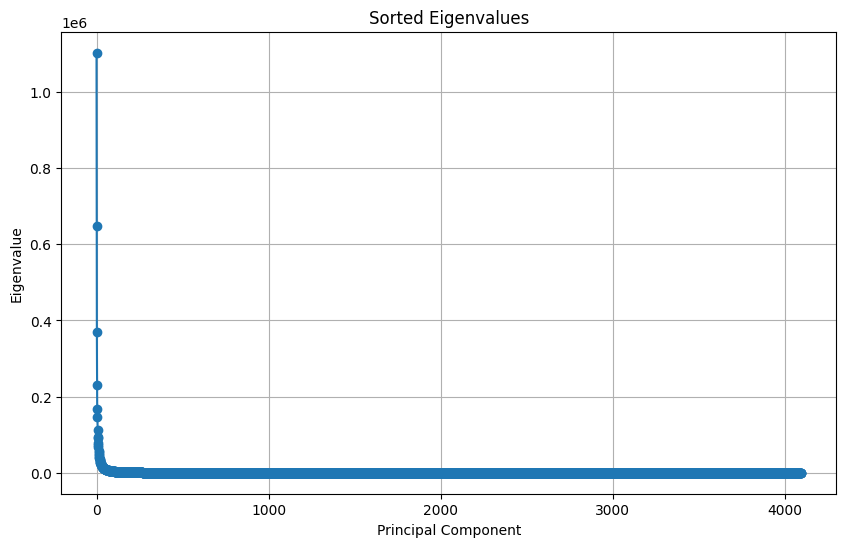

Largest eigenvalue: 1.1034e+06


In [100]:
# covariance matrix
covMatrix = np.cov(facesMinusMean, rowvar=False)

# eigenvalue decomp
eigenValues, eigenVectors = np.linalg.eigh(covMatrix)

# sort the eigenvalues
sortedIndices = np.argsort(eigenValues)[::-1]
sortedEigen = eigenValues[sortedIndices]

# plot the sorted eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(sortedEigen, marker='o', linestyle='-')
plt.title('Sorted Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# largest eigenvalue in scientific notation
largestEigen = sortedEigen[0]
print(f"Largest eigenvalue: {largestEigen:.4e}")

### (d) [5 points] You will find the last (i.e., 400th) eigenvalue is 0. Explain why.

The last eigenvalue being zero in the PCA of the face imagesmean that the actual number of dimensions in the dataset is less than 400 due to either redundancy in the images or small differences in the data. This means that not all 400 principal components are needed to capture the differences in the data. The zero eigenvalue shows that there is redundant info in the data and not enough eniuqness.


### (e) [5 points] Based on the eigenvalues, determine the dimensionality of the data you want to keep (i.e., how many principal components you want to keep), which accounts for most of the variance. (2 points) 
### Explain your reason. (3 points)

In [101]:
# cumulative variance
cumVar = np.cumsum(sortedEigen) / np.sum(sortedEigen)

# number of principal components to keep
threshold = 0.95  
numComponents = np.argmax(cumVar >= threshold) + 1

# display results
print(f"Principal components to keep: {numComponents}")


Principal components to keep: 123


I chose 0.95 because it is a good blalce between keeping important features and at the same time reducing its complexity.

### (f) [10 points] Display the top-5 leading eigenvectors (corresponding to the top-5 largest eigenvalues) in 5 figures

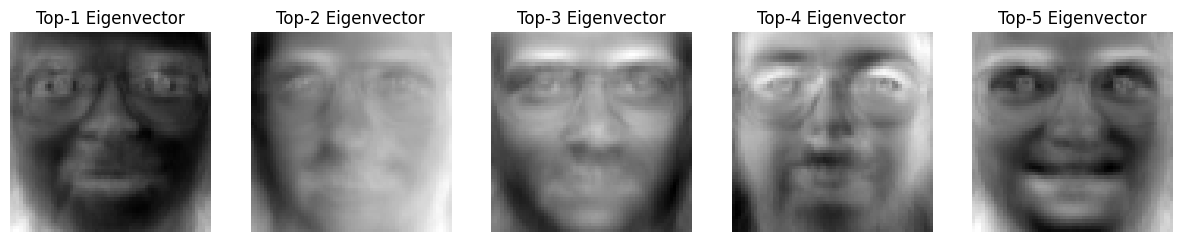

In [102]:


# display the top-5 leading eigenvectors
plt.figure(figsize=(15, 10))
for i in range(5):
    # subplots 
    plt.subplot(1,5, i+1)
    eigenVector = eigenVectors[:, sortedIndices[i]].reshape(64, 64).T
    plt.imshow(eigenVector, cmap='gray')
    plt.title(f"Top-{i+1} Eigenvector")
    plt.axis('off')

plt.show()


### 

### (g) [10 points] Display, respectively, the reconstructed/recovered 200th images using 10, 100, 200, and 399 principal components

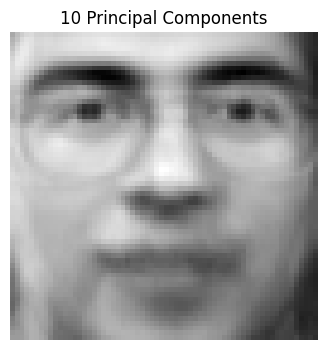

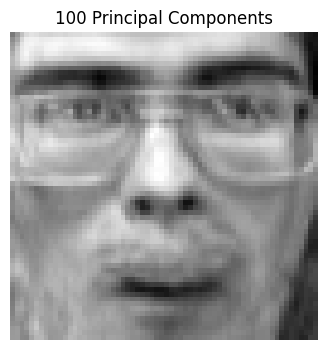

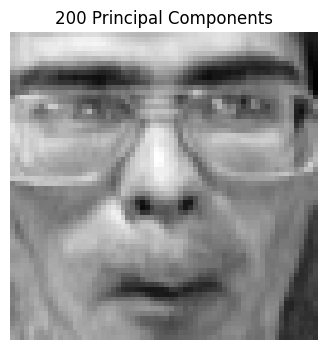

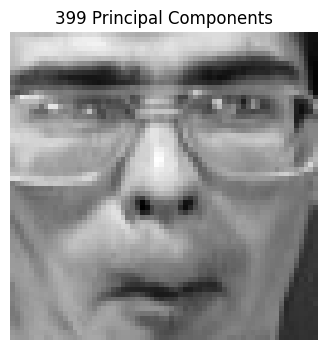

In [103]:

# sort eigens
eigenvalues = eigenValues[sortedIndices]
eigenvectors = eigenVectors[:, sortedIndices]

# components
components = [10, 100, 200, 399]
# hold reconstructed images
reconstructedImages = {}

# reconstruct images using different numbers of components
for k in components:
    eigenK = eigenvectors[:, :k]
    # project
    projected = eigenK.T @ facesMinusMean[199, :]
    # reconstruct
    reconstructed = eigenK @ projected
    #add back mean
    reconstructed += meanImg
    reconstructedImages[k] = reconstructed.reshape(64, 64).T

    # plot each reconstructed image 
    plt.figure(figsize=(4, 4))
    plt.imshow(reconstructedImages[k], cmap='gray')
    plt.title(f'{k} Principal Components')
    plt.axis('off')
    plt.show()

## 1 Generative Models, Naive Bayes Classifier [20 points]

(a) 
p(Water = warm|Play = yes) = 2/3
p(Water = warm|Play = no) = 1 

    
(b) 
p(Play = yes|Water = warm) = 2/3
p(Play = no|Water = warm) = 1/3

(c) 
p(Play = yes|Forecast = same) = 1
p(Play = yes|Forecast = change) = 1/2

(d)
p(Water = warm|Play = yes) =  3/5
p(Water = warm|Play = no) = 2/3